In [142]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [143]:
orgdata = pd.read_csv('LawTech_0727_Pandas.csv')

In [144]:
orgdata.head()

,Unnamed: 0,title,date,judge,content,link
0,0,最高法院 108 年度 台上 字第 2708 號刑事判決（15K）,109.09.30,詐欺,最高法院刑事判決 108年度台上字第2708號\n上 訴 人 林鶴爵\n\...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...
1,1,最高法院 109 年度 台上 字第 1719 號刑事判決（29K）,109.04.15,違反證券交易法等罪,最高法院刑事判決 108年度台上字第4056號\n ...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...
2,2,最高法院 108 年度 台上 字第 4056 號刑事判決（29K）,109.04.15,違反證券交易法等罪,最高法院刑事判決 108年度台上字第4056號\n ...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...
3,3,最高法院 108 年度 台上 字第 16 號刑事判決（37K）,109.01.16,違反證券交易法等罪,最高法院刑事判決 108年度台上字第16號\n上 訴 人 臺灣高等檢察署...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...
4,4,最高法院 109 年度 台抗 字第 46 號刑事裁定（5K）,109.01.09,違反證券交易法等罪不服再執行羈押,最高法院刑事裁定 109年度台抗字第46號\n抗 告 人 許金龍\n\n...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...


In [145]:
documents = ['我是東吳大學巨量資料管理學院蔡芸琤老師']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/東吳大學/巨量資料管理學院/蔡芸琤/老師


In [146]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/東吳大學/巨量資料管理學院/蔡芸琤/老師


In [147]:
orgdata['seg'] = ""
orgdata.head()

,Unnamed: 0,title,date,judge,content,link,seg
0,0,最高法院 108 年度 台上 字第 2708 號刑事判決（15K）,109.09.30,詐欺,最高法院刑事判決 108年度台上字第2708號\n上 訴 人 林鶴爵\n\...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,
1,1,最高法院 109 年度 台上 字第 1719 號刑事判決（29K）,109.04.15,違反證券交易法等罪,最高法院刑事判決 108年度台上字第4056號\n ...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,
2,2,最高法院 108 年度 台上 字第 4056 號刑事判決（29K）,109.04.15,違反證券交易法等罪,最高法院刑事判決 108年度台上字第4056號\n ...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,
3,3,最高法院 108 年度 台上 字第 16 號刑事判決（37K）,109.01.16,違反證券交易法等罪,最高法院刑事判決 108年度台上字第16號\n上 訴 人 臺灣高等檢察署...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,
4,4,最高法院 109 年度 台抗 字第 46 號刑事裁定（5K）,109.01.09,違反證券交易法等罪不服再執行羈押,最高法院刑事裁定 109年度台抗字第46號\n抗 告 人 許金龍\n\n...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,


In [198]:
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['content']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

d:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
orgdata['seg']

0     [上訴, 原判, 沒收, 理由, 證據, 明細, 德育, 公司, 認定, 指摘, 本案, 意...
1     [原判, 編號, 附表, 王宗立, 專案, 交易法, 上訴, 證券, 被害人, 所示, 修正...
2     [原判, 編號, 附表, 王宗立, 專案, 交易法, 上訴, 證券, 被害人, 所示, 修正...
3     [原判, 許金龍, 公司, 條第, 105, 事實, 犯罪, 交易法, 證券, 謝東波, 財...
4     [抗告, 羈押, 具保, 條第, 執行, 退保, 刑事, 108, 原審, 12, 訴訟法,...
5     [財務, 上訴, 報告, 勤美, 公司, 下稱, 97, 投資人, 95, 萬元, 98, ...
6     [條第, 羈押, 具保, 抗告, 被告, 裁定, 停止, 同法, 171, 108, 億元,...
7     [證券, 原判, 條第, 被害人, 被告, 交易法, 價證券, 有價, 17, 未上市, 偽...
8     [95, 上訴, 財報, 仕欽, 條第, 附表, 公司, 損害, 董事, 賠償, 20, 監...
9     [YUR, 原判, 證券, 條第, 科風, 財務, 說明, POWER, 公司, 認定, 報...
10    [銀行, 博達, 上訴, 公司, 附表, 賠償, 永豐, 財務, 報告, 93, 92, 不...
11    [上訴, 證據, 原判, 影響, 證券, 修正, 投資, 消息, 理由, 交易法, 規定, ...
12    [上訴, 揚崴, 原判, 專利權, 化油器, 張龍憲, 公司, 證券, 王明, 張龍, 理由...
13    [抗告, 出境, 裁定, 執行, 審判, 限制, 刑事, 第一, 出海, 檢察官, 交易法,...
14    [景天, 上訴, 原判, 增資, 判決, 公司, 李易翰, 理由, 違反, 證券, 顧問, ...
15    [鑑定, EUPA, 吳燦坤, 掛牌, 公司, 檢察官, 上訴, 意見, 永生, 燦坤, 美...
16    [財務, 報告, 原判, 公司, 重大, 交易, 鑑定, 規定, 認定, 事項, 本法, 上...
17    [原判, 福建, 盧寶琴, 證券, 負責人, 公司, 記載, 資金, 規定, 政忠,

In [200]:
date_split = orgdata['date'].iloc[0].split('.')

In [201]:
date_split[0]

'109'

In [202]:
orgdata['year'] = ""
index = 0
for documents in orgdata['date']:
    date_split = documents.split('.')
    orgdata['year'].iloc[index] = date_split[0]
    index += 1

In [203]:
orgdata.head()

,Unnamed: 0,title,date,judge,content,link,seg,year
0,0,最高法院 108 年度 台上 字第 2708 號刑事判決（15K）,109.09.30,詐欺,最高法院刑事判決 108年度台上字第2708號\n上 訴 人 林鶴爵\n\...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[上訴, 原判, 沒收, 理由, 證據, 明細, 德育, 公司, 認定, 指摘, 本案, 意...",109
1,1,最高法院 109 年度 台上 字第 1719 號刑事判決（29K）,109.04.15,違反證券交易法等罪,最高法院刑事判決 108年度台上字第4056號\n ...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[原判, 編號, 附表, 王宗立, 專案, 交易法, 上訴, 證券, 被害人, 所示, 修正...",109
2,2,最高法院 108 年度 台上 字第 4056 號刑事判決（29K）,109.04.15,違反證券交易法等罪,最高法院刑事判決 108年度台上字第4056號\n ...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[原判, 編號, 附表, 王宗立, 專案, 交易法, 上訴, 證券, 被害人, 所示, 修正...",109
3,3,最高法院 108 年度 台上 字第 16 號刑事判決（37K）,109.01.16,違反證券交易法等罪,最高法院刑事判決 108年度台上字第16號\n上 訴 人 臺灣高等檢察署...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[原判, 許金龍, 公司, 條第, 105, 事實, 犯罪, 交易法, 證券, 謝東波, 財...",109
4,4,最高法院 109 年度 台抗 字第 46 號刑事裁定（5K）,109.01.09,違反證券交易法等罪不服再執行羈押,最高法院刑事裁定 109年度台抗字第46號\n抗 告 人 許金龍\n\n...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[抗告, 羈押, 具保, 條第, 執行, 退保, 刑事, 108, 原審, 12, 訴訟法,...",109


In [218]:
orgdata.to_csv("LawTech_0727_TextMining.csv", index=False)

In [204]:
Counter(orgdata['year']).keys()

dict_keys(['109', '108', '107', '106', '105', '104', '103', '102', '101', '100', '99', '98', '96', '85'])

In [205]:
words = list(orgdata['judge'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [206]:
df = [show_key, show_values]

In [207]:
result = pd.concat(df, axis=1)
result.columns = ['judge', 'freguency']
result

,judge,freguency
0,詐欺,1
1,違反證券交易法等罪,12
2,違反證券交易法等罪不服再執行羈押,1
3,請求損害賠償,4
4,違反證券交易法等罪聲請具保停止羈押,1
5,請求侵權行為損害賠償,1
6,違反證券交易法,16
7,違反證券交易法等罪限制出境出海,1
8,請求侵權行為損害賠償等,1
9,違反證券交易法等罪聲請再審及停止執行,1


In [208]:
import plotly.express as px
import pandas as pd

px.bar(result, x='judge', y='freguency', title='judge term from 85 to 109')

In [209]:
show_sub = orgdata['judge']=='違反證券交易法'
subdata = orgdata[show_sub]
subdata

,Unnamed: 0,title,date,judge,content,link,seg,year
9,9,最高法院 106 年度 台上 字第 278 號刑事判決（12K）,106.09.28,違反證券交易法,最高法院刑事判決 106年度台上字第278號\n上 訴 人 臺灣高等法院檢...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[YUR, 原判, 證券, 條第, 科風, 財務, 說明, POWER, 公司, 認定, 報...",106
11,11,最高法院 106 年度 台上 字第 86 號刑事判決（33K）,106.05.31,違反證券交易法,最高法院刑事判決 一○六年度台上字第八六號\n上 訴 人 葉禾庠（原名葉健和）...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[上訴, 證據, 原判, 影響, 證券, 修正, 投資, 消息, 理由, 交易法, 規定, ...",106
12,12,最高法院 106 年度 台上 字第 1115 號刑事判決（13K）,106.05.04,違反證券交易法,最高法院刑事判決 一○六年度台上字第一一一五號\n上 訴 人 黃文賢\n選任辯護人...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[上訴, 揚崴, 原判, 專利權, 化油器, 張龍憲, 公司, 證券, 王明, 張龍, 理由...",106
15,15,最高法院 105 年度 台上 字第 2144 號刑事判決（20K）,105.08.23,違反證券交易法,最高法院刑事判決 一○五年度台上字第二一四四號\n上 訴 人 台灣高等法院檢察署檢...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[鑑定, EUPA, 吳燦坤, 掛牌, 公司, 檢察官, 上訴, 意見, 永生, 燦坤, 美...",105
16,16,最高法院 105 年度 台上 字第 1948 號刑事判決（14K）,105.08.04,違反證券交易法,最高法院刑事判決 一○五年度台上字第一九四八號\n上 訴 人 郭麗美\n選任辯護人...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[財務, 報告, 原判, 公司, 重大, 交易, 鑑定, 規定, 認定, 事項, 本法, 上...",105
18,18,最高法院 104 年度 台上 字第 3516 號刑事判決（5K）,104.11.19,違反證券交易法,最高法院刑事判決 一○四年度台上字第三五一六號\n上 訴 人 陳俟杰\n上列上訴人...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[上訴, 理由, 一卡, 原判, 判決, 資料, 認定, 證據, 事實, 第三, 違法, 張...",104
20,20,最高法院 104 年度 台上 字第 3041 號刑事判決（25K）,104.10.08,違反證券交易法,最高法院刑事判決 一○四年度台上字第三○四一號\n上 訴 人 台灣高等法院檢察署檢...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[證券, 原判, 上訴, Fund, LP, 投資人, 交易法, Lydia, 判決, 股權...",104
23,23,最高法院 104 年度 台非 字第 107 號刑事判決（8K）,104.04.16,違反證券交易法,最高法院刑事判決 一○四年度台非字第一○七號\n上 訴 人 最高法院檢察署檢察總...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[林國仁, 珍通, 上訴, 呂德茂, 原判, 許金村, 調查, 認定, 證據, 適用, 被告...",104
24,24,最高法院 104 年度 台上 字第 1060 號刑事判決（13K）,104.04.16,違反證券交易法,最高法院刑事判決 一○四年度台上字第一○六○號\n上 訴 人 張伊犂\n選任辯護人...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[上訴, 證據, 原判, 違法, 調查, 理由, 判決, 公司, 意旨, 認定, 原審, 第...",104
29,29,最高法院 103 年度 台上 字第 196 號刑事判決（7K）,103.01.16,違反證券交易法,最高法院刑事判決 一○三年度台上字第一九六號\n上 訴 人 唐濟群\n選任辯護人...,https://law.judicial.gov.tw/FJUD/data.aspx?ro=...,"[上訴, 規定, 原判, 交易法, 保證, 虛偽, 證券, 記載, 背書, 瑩寶, 財務, ...",103


In [210]:
type(subdata['seg'])

pandas.core.series.Series

In [211]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [212]:
subdata_seg_list

[['YUR',
  '原判',
  '證券',
  '條第',
  '科風',
  '財務',
  '說明',
  'POWER',
  '公司',
  '認定',
  '報告',
  'Yuraku',
  'Pte',
  '發行',
  'Ltd',
  '指標',
  '交易法',
  '銷售',
  '理由',
  '交易',
  '判決',
  '責任',
  '規定',
  '家電廠',
  '應收',
  '帳款',
  '事項',
  '行為',
  '刑事',
  '青妙',
  '100',
  '98',
  '銷貨',
  '20',
  '判斷',
  'Powercom',
  '決第',
  '重大',
  '部分',
  '揭露',
  '上訴',
  '下稱',
  '99',
  '證據',
  '對象',
  '企業',
  '影響',
  '隱匿',
  '內容',
  '資訊',
  '量性',
  '例示',
  '違反',
  '15',
  '171',
  '發回',
  '事實',
  '申報',
  '實罪',
  '虛偽',
  '記載',
  '否則',
  '17',
  '仟元',
  '社會',
  '反詐',
  '質性',
  '檢視',
  '行人',
  '年度',
  '大利',
  '要件',
  '法官',
  '106',
  '決關',
  '財報',
  '撤銷',
  '會計',
  '年間',
  '歐倉',
  '之銷',
  '實際',
  '認為',
  '訴訟法',
  '適用',
  '客觀',
  '呂姿儀',
  '明函',
  'SA',
  '金額',
  '作為',
  '至於',
  '業務',
  '財務報',
  '欺條款',
  '投資人',
  '學理',
  '13',
  '具備',
  '原審',
  '法院',
  '本院',
  '情事',
  '指摘',
  '高等法院',
  '法令',
  '收入',
  '是否',
  '大量出',
  '援引',
  '有人',
  '科刑',
  '檢察署',
  '選任',
  '辯護人',
  '25',
  '偵字',
  '101',
  '實欄',
  '依證券',
  '負責',

In [213]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [214]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [215]:
mask = np.array(Image.open("criminal.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [216]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

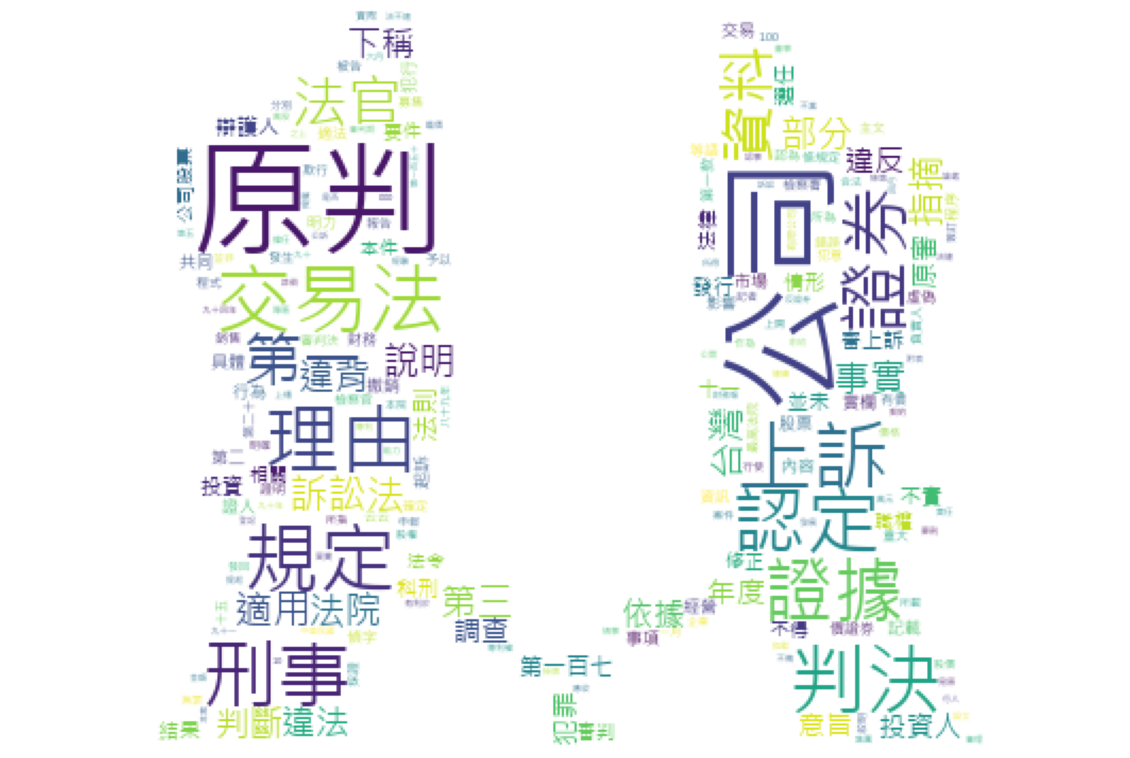

In [217]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()